In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading the dataframe

import pandas as pd 
df_img = pd.read_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/df_final_new.pkl")

In [ ]:
import numpy as np

In [ ]:
from pathlib import Path
import numpy as np
from keras.preprocessing.text import Tokenizer

def load_glove(url):
    f = open(url.absolute())
    embeddings_index = dict()
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index

GLOVE_URL = Path("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/glove.6B.100d.txt")
glove = load_glove(GLOVE_URL)
t = Tokenizer()
t.fit_on_texts(glove.keys())
vocab_size = len(t.word_index) + 1

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,ReLU,BatchNormalization,Dropout,Embedding,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D,Flatten
import numpy as np

In [ ]:
#text branch
#Explicit features
model_text_explicit = Sequential()
model_text_explicit.add(Dense(128, input_dim=31))
model_text_explicit.add(BatchNormalization())
model_text_explicit.add(ReLU())

model_text_explicit.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4096      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
re_lu (ReLU)                 (None, 128)               0         
Total params: 4,608
Trainable params: 4,352
Non-trainable params: 256
_________________________________________________________________


In [ ]:
#text branch
#text Latent features

model_text_latent = Sequential()
model_text_latent.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=1000,trainable=False))    #1000 is length of sentence and 100 is embedding dimension as glove100 used
model_text_latent.add(Dropout(0.5))
model_text_latent.add(Conv1D(10,3))
model_text_latent.add(MaxPooling1D(pool_size=2))
model_text_latent.add(Flatten())
model_text_latent.add(Dense(128))
model_text_latent.add(BatchNormalization())
model_text_latent.add(ReLU())
model_text_latent.add(Dropout(0.8))

model_text_latent.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         33925200  
_________________________________________________________________
dropout (Dropout)            (None, 1000, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 10)           3010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 499, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4990)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               638848    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)              

In [ ]:
#text branch
#title Latent features

model_title_latent = Sequential()
model_title_latent.add(Embedding(vocab_size,100,weights=[embedding_matrix],input_length=93,trainable=False))    #1000 is length of sentence and 100 is embedding dimension as glove100 used
model_title_latent.add(Dropout(0.5))
model_title_latent.add(Conv1D(10,3))
model_title_latent.add(MaxPooling1D(pool_size=2))
model_title_latent.add(Flatten())
model_title_latent.add(Dense(128))
model_title_latent.add(BatchNormalization())
model_title_latent.add(ReLU())
model_title_latent.add(Dropout(0.8))

model_title_latent.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 93, 100)           33925200  
_________________________________________________________________
dropout_5 (Dropout)          (None, 93, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 91, 10)            3010      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 10)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 450)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               57728     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [ ]:
#image branch
#Explicit features
model_img_explicit = Sequential()
model_img_explicit.add(Dense(128, input_dim=3))
model_img_explicit.add(BatchNormalization())
model_img_explicit.add(ReLU())

model_img_explicit.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               512       
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 128)               0         
Total params: 1,024
Trainable params: 768
Non-trainable params: 256
_________________________________________________________________


In [ ]:
#image branch
#Latent features
model_img_latent = Sequential()
model_img_latent.add(Conv2D(32,(3,3),input_shape=(50,50,3)))
model_img_latent.add(ReLU())
model_img_latent.add(Dropout(0.8))
model_img_latent.add(MaxPooling2D(pool_size=(2,2)))
model_img_latent.add(Conv2D(32,(3,3)))
model_img_latent.add(ReLU())
model_img_latent.add(Dropout(0.8))
model_img_latent.add(MaxPooling2D(pool_size=(2,2)))
model_img_latent.add(Conv2D(32,(3,3)))
model_img_latent.add(ReLU())
model_img_latent.add(Dropout(0.8))
model_img_latent.add(MaxPooling2D(pool_size=(2,2)))
model_img_latent.add(Flatten())
model_img_latent.add(Dense(128))
model_img_latent.add(BatchNormalization())
model_img_latent.add(ReLU())

model_img_latent.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)       

In [ ]:
Y=df_img['type']
X=df_img.loc[ : , df_img.columns != 'type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_comb, y_train, y_comb = train_test_split(X, Y, test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_comb, y_comb, test_size=0.5,random_state=42)

In [ ]:
X_train_img_latent=X_train['img_vec']
X_train_img_explicit=X_train.loc[:, ['face_count', 'width', 'height']]
X_train_text_latent=X_train.loc[:, ['text']]
X_train_title_latent=X_train.loc[:, ['title']]
X_train_text_explicit=X_train.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]
X_test_img_latent=X_test['img_vec']
X_test_img_explicit=X_test.loc[:, ['face_count', 'width', 'height']]
X_test_text_latent=X_test.loc[:, ['text']]
X_test_title_latent=X_test.loc[:, ['title']]
X_test_text_explicit=X_test.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]
X_val_img_latent=X_val['img_vec']
X_val_img_explicit=X_val.loc[:, ['face_count', 'width', 'height']]
X_val_text_latent=X_val.loc[:, ['text']]
X_val_title_latent=X_val.loc[:, ['title']]
X_val_text_explicit=X_val.loc[:, ['caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all']]

In [ ]:
X_train_img_explicit=np.asarray(X_train_img_explicit).astype(np.float32)
X_train_text_explicit=np.asarray(X_train_text_explicit).astype(np.float32)

In [ ]:
X_test_img_explicit=np.asarray(X_test_img_explicit).astype(np.float32)
X_test_text_explicit=np.asarray(X_test_text_explicit).astype(np.float32)

In [ ]:
X_val_img_explicit=np.asarray(X_val_img_explicit).astype(np.float32)
X_val_text_explicit=np.asarray(X_val_text_explicit).astype(np.float32)

In [ ]:
y_train_cp=np.asarray(y_train).astype(np.float32)
y_test_cp=np.asarray(y_test).astype(np.float32)
y_val_cp=np.asarray(y_val).astype(np.float32)

In [ ]:
X_train_img_latent= pd.DataFrame(X_train_img_latent)

In [ ]:
X_train_img_latent['img_vec'].isnull().sum()

0

In [ ]:
img_latent_error=[]
count=0
for i,row in X_train_img_latent.iterrows():
  try:
      if (row['img_vec'].shape!=(50, 50, 3)):
        print(str(i)+'\n')
        img_latent_error.append(i)
        count=count+1
  except:
    img_latent_error.append(i)
    count=count+1
    continue
print(count)

0


In [ ]:
img_latent=[]
img_latent=np.array(X_train_img_latent['img_vec'][9527]).reshape(-1,50,50,3)
count=0
for i,row in X_train_img_latent.iterrows():
  if(count>0):
    img_latent=np.vstack([img_latent,np.array(row['img_vec']).reshape(-1,50,50,3)])
  count=count+1

In [ ]:
img_latent.shape

(4363, 50, 50, 3)

In [ ]:
X_test_img_latent= pd.DataFrame(X_test_img_latent)

In [ ]:
X_test_img_latent['img_vec'].isnull().sum()

0

In [ ]:
img_test_latent=[]
img_test_latent=np.array(X_test_img_latent['img_vec'][16113]).reshape(-1,50,50,3)
count=0
for i,row in X_test_img_latent.iterrows():
  if(count>0):
    img_test_latent=np.vstack([img_test_latent,np.array(row['img_vec']).reshape(-1,50,50,3)])
  count=count+1

img_test_latent.shape

(1455, 50, 50, 3)

In [ ]:
text_latent=[]
text_latent=np.array(X_train_text_latent['text'][9527]).reshape(-1,1000)
count=0
for i,row in X_train_text_latent.iterrows():
  if(count>0):
    text_latent=np.vstack([text_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [ ]:
text_latent.shape

(4363, 1000)

In [ ]:
text_test_latent=[]
text_test_latent=np.array(X_test_text_latent['text'][16113]).reshape(-1,1000)
count=0
for i,row in X_test_text_latent.iterrows():
  if(count>0):
    text_test_latent=np.vstack([text_test_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [ ]:
text_test_latent.shape

(1455, 1000)

In [ ]:
title_latent=[]
title_latent=np.array(X_train_title_latent['title'][9527]).reshape(-1,93)
count=0
for i,row in X_train_title_latent.iterrows():
  if(count>0):
    title_latent=np.vstack([title_latent,np.array(row['title']).reshape(-1,93)])
  count=count+1

In [ ]:
title_latent.shape

(4363, 93)

In [ ]:
title_test_latent=[]
title_test_latent=np.array(X_test_title_latent['title'][16113]).reshape(-1,93)
count=0
for i,row in X_test_title_latent.iterrows():
  if(count>0):
    title_test_latent=np.vstack([title_test_latent,np.array(row['title']).reshape(-1,93)])
  count=count+1

In [ ]:
title_test_latent.shape

(1455, 93)

In [ ]:
X_val_img_latent= pd.DataFrame(X_val_img_latent)

In [ ]:
X_val_img_latent['img_vec'].isnull().sum()

0

In [ ]:
img_val_latent=[]
img_val_latent=np.array(X_val_img_latent['img_vec'][15619]).reshape(-1,50,50,3)
count=0
for i,row in X_val_img_latent.iterrows():
  if(count>0):
    img_val_latent=np.vstack([img_val_latent,np.array(row['img_vec']).reshape(-1,50,50,3)])
  count=count+1

img_val_latent.shape

(1454, 50, 50, 3)

In [ ]:
text_val_latent=[]
text_val_latent=np.array(X_val_text_latent['text'][15619]).reshape(-1,1000)
count=0
for i,row in X_val_text_latent.iterrows():
  if(count>0):
    text_val_latent=np.vstack([text_val_latent,np.array(row['text']).reshape(-1,1000)])
  count=count+1

In [ ]:
text_val_latent.shape

(1454, 1000)

In [ ]:
title_val_latent=[]
title_val_latent=np.array(X_val_title_latent['title'][15619]).reshape(-1,93)
count=0
for i,row in X_val_title_latent.iterrows():
  if(count>0):
    title_val_latent=np.vstack([title_val_latent,np.array(row['title']).reshape(-1,93)])
  count=count+1

In [ ]:
title_val_latent.shape

(1454, 93)

In [ ]:
from keras.layers import concatenate,Add
from keras.models import Model
merged_text = Add()([model_text_explicit.output,model_text_latent.output,model_title_latent.output])
merged_img = Add()([model_img_explicit.output,model_img_latent.output])
combined_network = concatenate([merged_text,merged_img])

z  = ReLU()(combined_network)
z  = Dense(128)(z)
z =  BatchNormalization()(z)
z = Dense(1, activation='sigmoid')(z)
# our model will accept the inputs of the 5 branches and
# then output a single value
final_model_5 = Model(inputs=[model_text_explicit.input,model_text_latent.input,model_title_latent.input,model_img_explicit.input,model_img_latent.input], outputs=z)

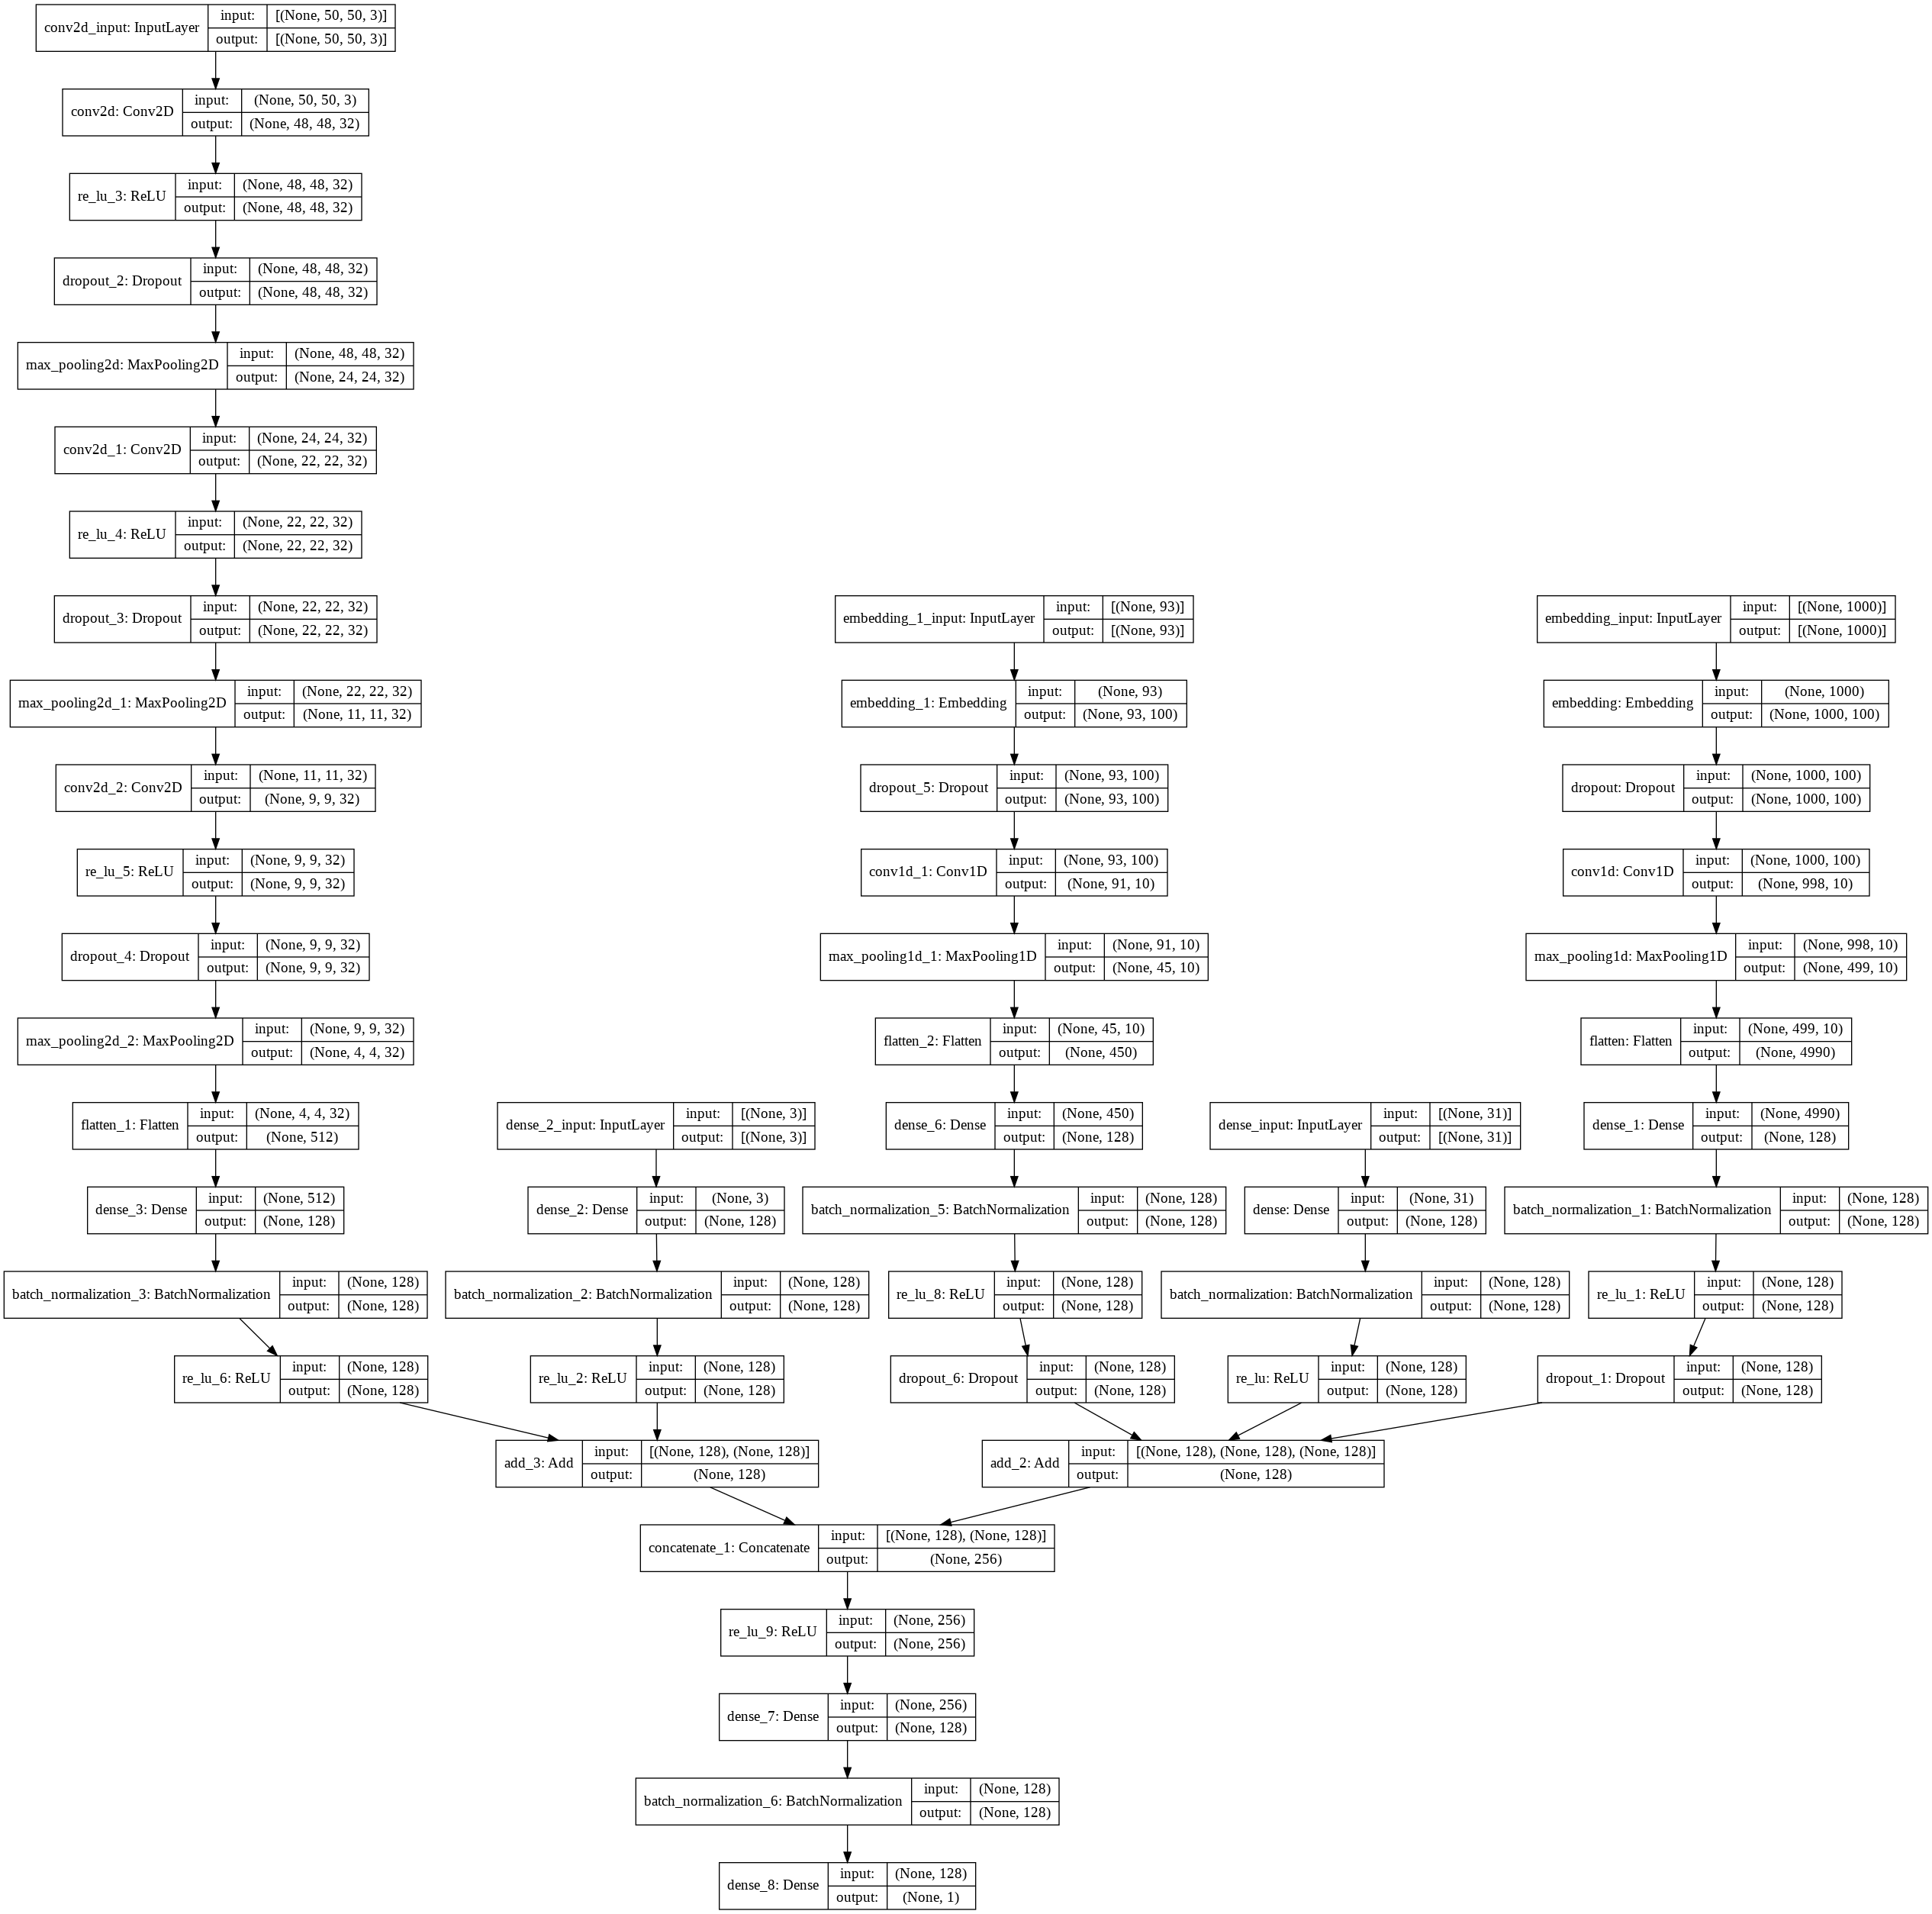

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(final_model_5,show_shapes=True, show_layer_names=True)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=1e-3, decay=1e-3 / 200)
final_model_5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8,restore_best_weights=True)
history=final_model_5.fit(
  x=[ X_train_text_explicit,text_latent,title_latent,X_train_img_explicit,img_latent], y=y_train.values,
	validation_data=([X_val_text_explicit,text_val_latent, title_val_latent,X_val_img_explicit,img_val_latent],y_val.values),callbacks=[es],
	epochs=40, batch_size=32)

Epoch 1/40
137/137 [==============================] - 37s 20ms/step - loss: 0.4716 - accuracy: 0.7928 - val_loss: 0.3690 - val_accuracy: 0.7978
Epoch 2/40
137/137 [==============================] - 2s 15ms/step - loss: 0.2257 - accuracy: 0.9020 - val_loss: 0.2066 - val_accuracy: 0.9292
Epoch 3/40
137/137 [==============================] - 2s 15ms/step - loss: 0.1691 - accuracy: 0.9345 - val_loss: 0.1787 - val_accuracy: 0.9285
Epoch 4/40
137/137 [==============================] - 2s 15ms/step - loss: 0.1304 - accuracy: 0.9548 - val_loss: 0.1624 - val_accuracy: 0.9395
Epoch 5/40
137/137 [==============================] - 2s 15ms/step - loss: 0.1135 - accuracy: 0.9554 - val_loss: 0.1668 - val_accuracy: 0.9374
Epoch 6/40
137/137 [==============================] - 2s 15ms/step - loss: 0.0966 - accuracy: 0.9651 - val_loss: 0.1490 - val_accuracy: 0.9546
Epoch 7/40
137/137 [==============================] - 2s 15ms/step - loss: 0.0987 - accuracy: 0.9634 - val_loss: 0.0992 - val_accuracy: 0.964

In [ ]:
y_pred=final_model_5.predict([X_test_text_explicit,text_test_latent,title_test_latent,X_test_img_explicit,img_test_latent])

In [ ]:
y_pred = (y_pred>=0.5)*1

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
precision = precision_score(y_test.values, y_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test.values,y_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.values, y_pred)
print('Precision is:'+str(precision))
print('Recall is:'+str(recall))
print('F1 score is:'+str(f1))
print('Accuracy is:'+str(accuracy_score(y_test.values,y_pred)))

Precision is:0.9925133689839573
Recall is:0.9967776584317938
F1 score is:0.9946409431939978
Accuracy is:0.993127147766323


In [ ]:
model_json =final_model_5.to_json()
with open("model_combined_final_5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
final_model_5.save_weights("model_combined_final_5.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test.values, y_pred)

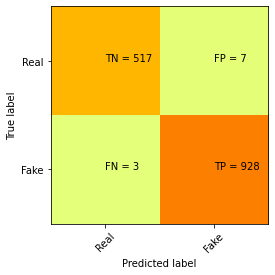

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Real','Fake']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
# Find the list of misclassified points

result = np.absolute(np.asarray(y_test).reshape(1455,-1)-y_pred)

In [ ]:
result=pd.DataFrame(result,index=y_test.index)

In [ ]:
result[result[0]==1]

,0
3396,1.0
10560,1.0
2001,1.0
3286,1.0
8746,1.0
3453,1.0
241,1.0
2710,1.0
8752,1.0
467,1.0
